In [1]:
%matplotlib inline
%gui qt

from astropy.io import ascii
from numpy import *
from glue import qglue

import matplotlib.pyplot as plt

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')




/Users/suchanek/anaconda3/envs/TF/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
catalog_path = "/Users/suchanek/Documents/MIRA/legac_files/"

In [3]:
data = ascii.read(catalog_path+'legac.cat')

In [4]:
UV = data['UV']
VJ = data['VJ']

In [5]:
quiescent_selection = [(UV > 0.8*VJ+0.7) & (UV > 1.3) & (VJ < 1.5) & (data['use'] == 1)]

In [6]:
uv_quiescent = UV[tuple(quiescent_selection)]
vj_quiescent = VJ[tuple(quiescent_selection)]

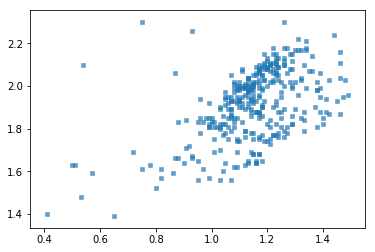

In [7]:
plt.scatter(vj_quiescent,uv_quiescent,marker='s',s=16,alpha=0.7,linewidth=0.5)

In [8]:
HDelta_D4000_selection = [(data['LICK_HD_A'][quiescent_selection] > -99) &
                          (data['D4000_N'][quiescent_selection] > -99)]

Text(0, 0.5, 'U-V')

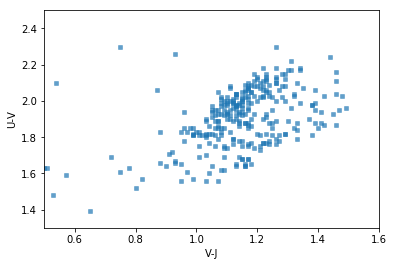

In [9]:
plt.scatter(vj_quiescent[tuple(HDelta_D4000_selection)],
            uv_quiescent[tuple(HDelta_D4000_selection)],
            marker='s',s=16,alpha=0.7,linewidth=0.5)
plt.xlim(0.5,1.6)
plt.ylim(1.3,2.5)
plt.xlabel('V-J')
plt.ylabel('U-V')



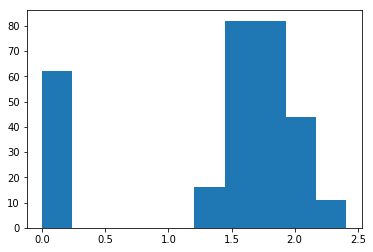

In [10]:
d4000_selection = [data['D4000_N'][quiescent_selection] > -99]
d4000 = data['D4000_N'][quiescent_selection][d4000_selection]
n,bins,patches = plt.hist(d4000)

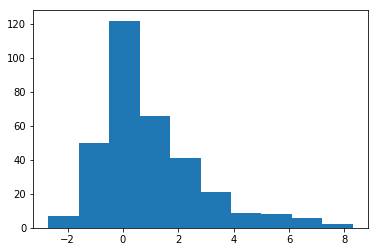

In [11]:
HDelta_selection = [data['LICK_HD_A'][quiescent_selection] > -99]
HDelta = data['LICK_HD_A'][quiescent_selection][HDelta_selection]
n,bins,patches = plt.hist(HDelta)

In [12]:
HDelta = data['LICK_HD_A'][quiescent_selection][HDelta_D4000_selection]
D4000 = data['D4000_N'][quiescent_selection][HDelta_D4000_selection]

Text(0, 0.5, 'Hdelta')

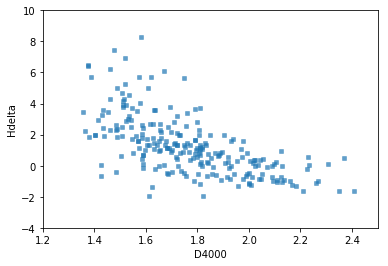

In [13]:
plt.scatter(D4000,HDelta,
            marker='s',s=16,alpha=0.7,linewidth=0.5)
plt.xlim(1.2,2.5)
plt.ylim(-4,10)
plt.xlabel('D4000')
plt.ylabel('Hdelta')

In [ ]:
app = qglue(xyz=D4000)